In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qadence import *

import torch
from torch.autograd import grad

### Hyperparams

In [2]:
RANDOM_STATES = [42, 1615956328, 247970482, 89419800, 71286725, 313474683, 264278394, 1471746552, 2002605652, 1217919795] #np.random.randint(0, 2**31-1, size=10) 
print("Seeds: ", RANDOM_STATES)
LEARNING_RATES = [0.1] 
K= [1] 
LAMBDA = [2*torch.pi] 

Seeds:  [42, 1615956328, 247970482, 89419800, 71286725, 313474683, 264278394, 1471746552, 2002605652, 1217919795]


### Inputs

In [3]:
def generate_chebyshev_grid(n, a, b, requires_grad=True): 
    k = torch.arange(n)
    chebyshev_nodes = torch.cos(torch.pi * (2*k + 1) / (2*n))  #standard Chebyshev nodes in [-1,1]
    scaled_nodes = ((chebyshev_nodes + 1) / 2) * (b - a) + a  #rescale to [a, b]
    
    return scaled_nodes.requires_grad_(requires_grad=requires_grad)

# X train
N_POINTS = 20
a = 0.0
b = 0.9
x = generate_chebyshev_grid(N_POINTS, a, b)
print(x.detach().numpy())
cp_fixed = torch.reshape(x, (N_POINTS,1))

# X test
sample_points = generate_chebyshev_grid(100, a, b, requires_grad=False).reshape(-1, 1)

[0.8986128  0.88756646 0.86574579 0.83368807 0.79218268 0.74225162
 0.68512435 0.62220754 0.55505041 0.48530659 0.41469341 0.34494959
 0.27779246 0.21487565 0.15774838 0.10781732 0.06631193 0.03425421
 0.01243354 0.0013872 ]


### Pseudo-Exhaustive search

Seed id:  0
Learning rate:  0.1
k = 1
lamb = 6.283185307179586
Initial angles:  [0.05815449 0.5261719  0.08354337 0.84251973 0.08810978 0.07473488
 0.03134017 0.26504491 0.2256651  0.06291017 0.47678475 0.13264067
 0.87050104 0.70118189 0.68343022 0.04036647 0.13043349 0.3175678
 0.12358607 0.9552357  0.1570535  0.37753296 0.62340308 0.31223868
 0.93190879 0.25185522 0.61440828 0.05258016 0.92875258 0.37536703
 0.61243659 0.437279   0.30905878 0.15212583 0.23340819 0.59777135]
0 (56.176600082225946, 2.885107521144875)
1 (31.494076167012736, 2.174221454861975)
2 (16.815223927981226, 1.3582693786221047)
3 (10.288805997707533, 0.7678289202809592)
4 (7.947167612305131, 0.45912310883214386)
5 (5.936310865231882, 0.29108113203250585)
6 (4.003816357435739, 0.19336333027749325)
7 (2.977352660733768, 0.1441353133628873)
8 (2.7752607458868637, 0.12191664356057022)
9 (2.7754218533727424, 0.10691801090820414)
10 (2.60457400311914, 0.08970636752313592)
11 (2.2259709845116147, 0.07000575725285964)
1

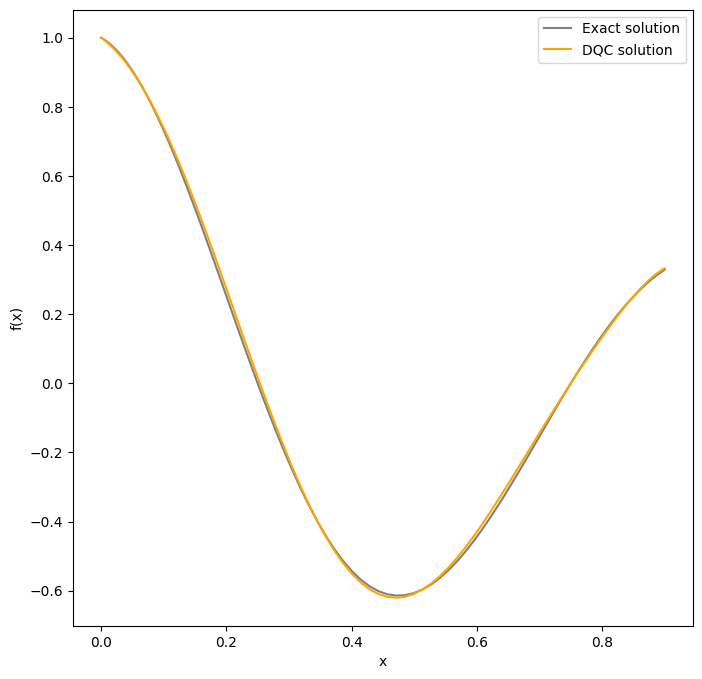

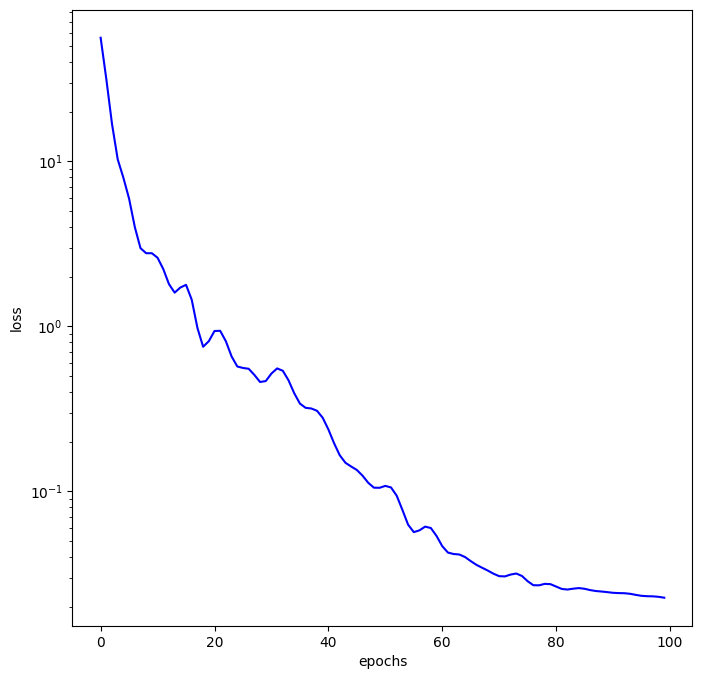

Seed id:  1
Learning rate:  0.1
k = 1
lamb = 6.283185307179586
Initial angles:  [0.11509135 0.18785561 0.87198031 0.43069277 0.37286309 0.3446643
 0.63929503 0.28262508 0.62499483 0.28251609 0.84476366 0.2735772
 0.13426407 0.94530719 0.98268494 0.93361481 0.3805877  0.55441653
 0.49609575 0.02221115 0.46135441 0.3949415  0.27314747 0.2461782
 0.59257332 0.77610958 0.4763519  0.86274192 0.56844783 0.85214649
 0.43361597 0.15061303 0.64765497 0.24329929 0.79167513 0.09533286]
0 (21.192468295225616, 3.43739403624866)
1 (17.14378623581529, 1.6786832296848793)
2 (8.675079543530845, 0.9001463311222716)
3 (8.981861525210316, 0.5009863598879352)
4 (7.703278587762459, 0.31868497995972345)
5 (4.384256210403194, 0.21061225730636712)
6 (2.3011105726674854, 0.14584428220251908)
7 (2.00533298009183, 0.10604292019481176)
8 (1.2919661884760463, 0.07831135687331217)
9 (0.4234913653640904, 0.06421221811231029)
10 (0.5102672922881585, 0.06177133298156935)
11 (0.9919495484919476, 0.06068262283591863)
12 

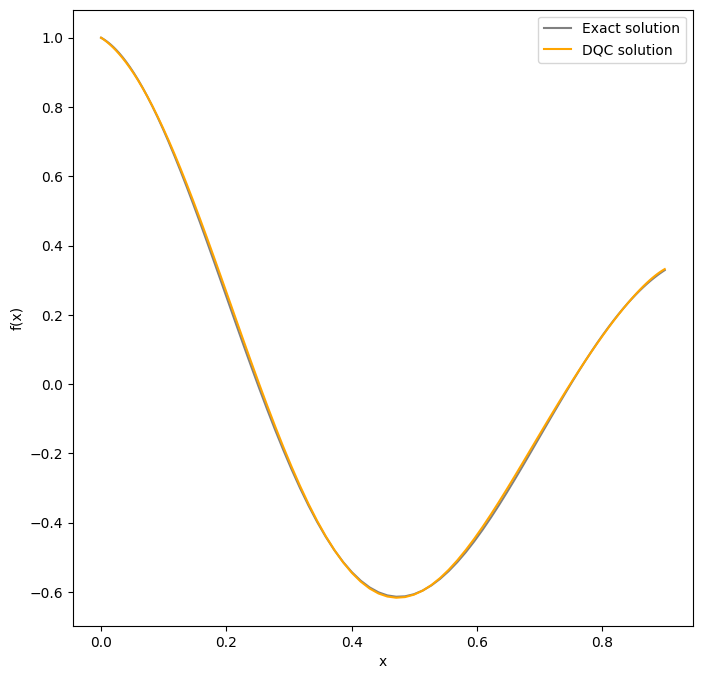

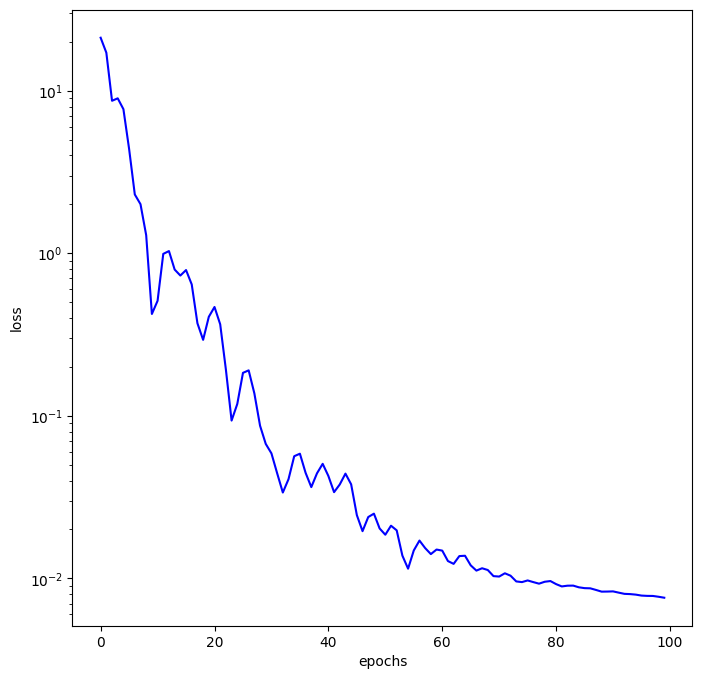

Seed id:  2
Learning rate:  0.1
k = 1
lamb = 6.283185307179586
Initial angles:  [0.18543459 0.74472979 0.5251464  0.1211122  0.82476533 0.07896078
 0.59880521 0.34957733 0.09977123 0.03539684 0.40759255 0.32058252
 0.86941313 0.85068359 0.1878618  0.9677477  0.58786968 0.12041333
 0.64924297 0.04606304 0.54736705 0.83775331 0.3206495  0.06567063
 0.93860961 0.94904842 0.11960008 0.41525635 0.93204042 0.8204543
 0.71215064 0.48395001 0.3750638  0.66971514 0.50565552 0.35372556]
0 (18.125819599318106, 1.8473835730730006)
1 (7.963301924876103, 0.6599544918907849)
2 (4.415611818273662, 0.16547171223485865)
3 (2.9342102691924574, 0.05829513194882739)
4 (2.0032693936862738, 0.04041471396197626)
5 (1.4094931692234776, 0.026877818748831123)
6 (1.293196077981682, 0.057254621146067886)
7 (1.4331569272869564, 0.10567747097062938)
8 (1.3544628879592935, 0.10870817236970676)
9 (0.9919905839628532, 0.06994688805766551)
10 (0.5662203544091176, 0.026598386814133363)
11 (0.297494280171379, 0.0039764805

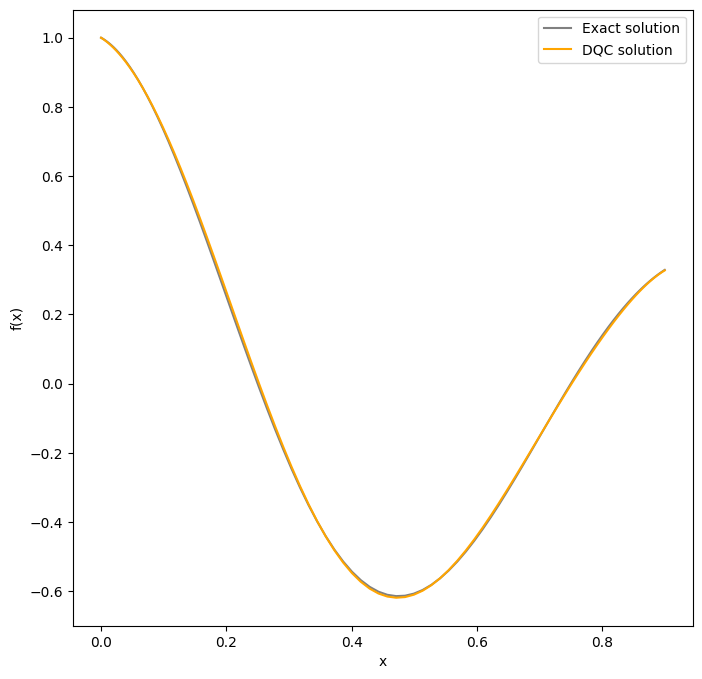

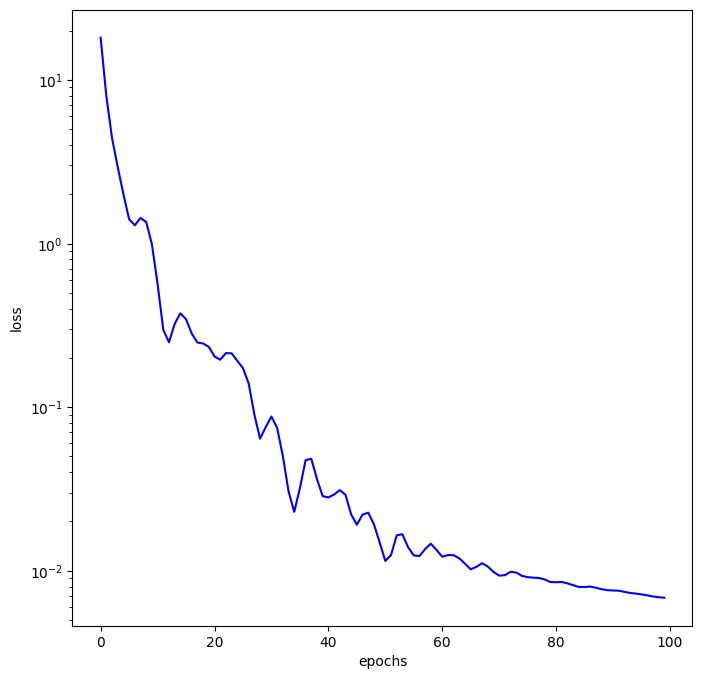

Seed id:  3
Learning rate:  0.1
k = 1
lamb = 6.283185307179586
Initial angles:  [0.14955737 0.84528484 0.02271131 0.80180799 0.54676922 0.7896882
 0.00769417 0.82521946 0.66456656 0.74109475 0.30849328 0.86004572
 0.82708304 0.74318754 0.84832804 0.13680561 0.93797301 0.75364427
 0.23716249 0.75213325 0.40781469 0.09256043 0.37050175 0.33223548
 0.14206504 0.89832511 0.38263329 0.30781149 0.58023792 0.07860108
 0.97864406 0.12615771 0.83448058 0.28280992 0.77252579 0.8380745 ]
0 (23.86354708949667, 1.8357999490254637)
1 (7.484878430989466, 0.793617753936924)
2 (2.8059119200753257, 0.32400190371467)
3 (3.3707279546574718, 0.19533538000937528)
4 (2.8420489131313107, 0.18042312392968124)
5 (1.868942435153993, 0.19477807476647327)
6 (1.6478549224235413, 0.18630871047381434)
7 (1.8567892322212167, 0.13735678059771697)
8 (1.656133698608248, 0.07607078324524416)
9 (1.0832697512403822, 0.03277432143331955)
10 (0.8254438142270694, 0.021286094942032253)
11 (1.0947634043797916, 0.0370036512333315

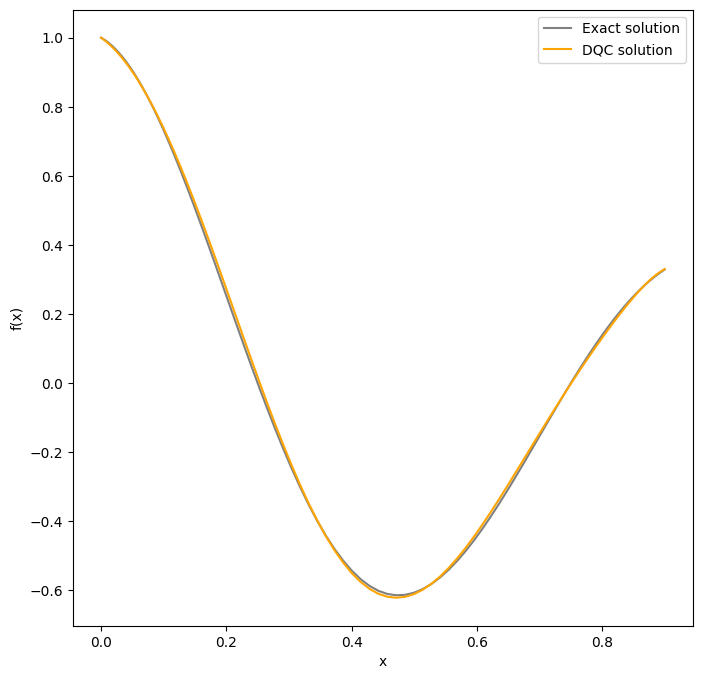

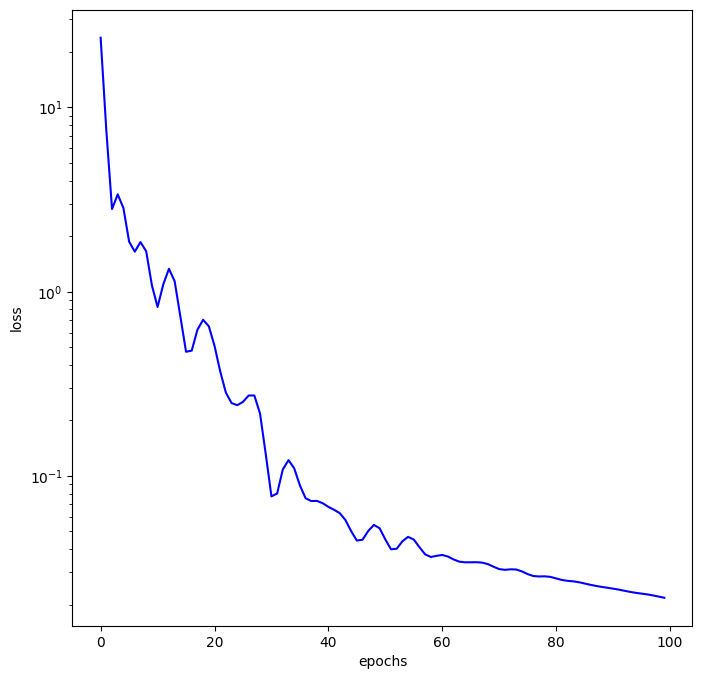

Seed id:  4
Learning rate:  0.1
k = 1
lamb = 6.283185307179586
Initial angles:  [0.01144863 0.36988973 0.9436568  0.41434199 0.99718627 0.16457535
 0.73878448 0.30243736 0.47427591 0.52490841 0.45162154 0.14771987
 0.20732145 0.51409631 0.99156375 0.87431383 0.96199752 0.1383988
 0.22999381 0.25126531 0.44377559 0.49203089 0.73889191 0.35296369
 0.52044039 0.35946564 0.64274834 0.32699566 0.13576491 0.91718642
 0.65013821 0.21070289 0.73413531 0.13684084 0.02367252 0.80011655]
0 (19.539658432658207, 3.240247432085814)
1 (8.560666783874018, 1.5505900504235264)
2 (4.26892875329831, 0.4390697078157415)
3 (3.193024715481191, 0.11666820438329362)
4 (1.5938778173158497, 0.04023277782273556)
5 (0.5867285170559506, 0.016594754876594286)
6 (0.6241840982450854, 0.014167928766589639)
7 (0.8280594315244105, 0.015103356629182042)
8 (0.8163609006748915, 0.013502778349615843)
9 (0.61925299745101, 0.01148615004718652)
10 (0.4172072158295811, 0.013615838226998805)
11 (0.3662142776647093, 0.018234356404

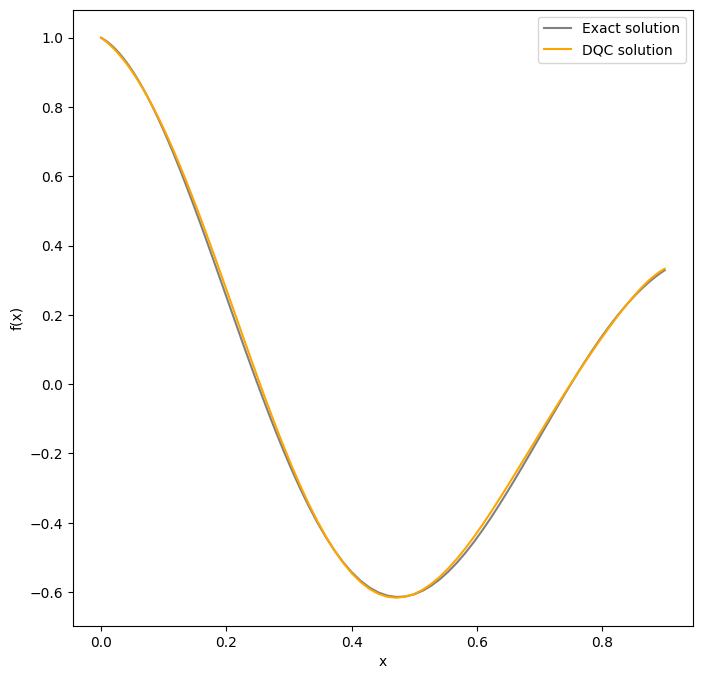

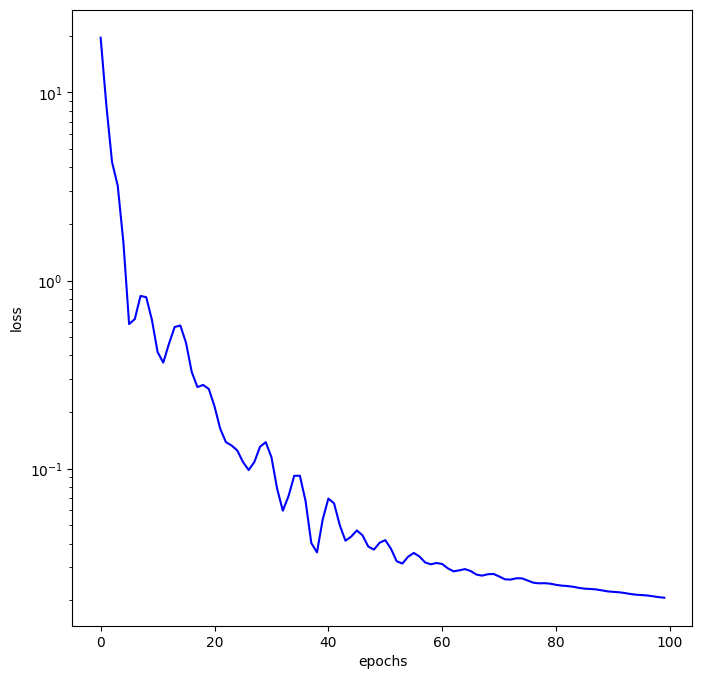

Seed id:  5
Learning rate:  0.1
k = 1
lamb = 6.283185307179586
Initial angles:  [0.43291866 0.89932474 0.77938046 0.90843623 0.52730087 0.52729684
 0.65233062 0.45694715 0.83997141 0.98902545 0.16314887 0.44388887
 0.92308515 0.77300649 0.46904019 0.33072243 0.53610791 0.50990407
 0.49336984 0.46336125 0.01629386 0.0969     0.59293226 0.00346304
 0.12031017 0.42137721 0.62632632 0.65260265 0.77769275 0.50043845
 0.44500835 0.13703568 0.96763564 0.0777357  0.42838109 0.26703816]
0 (46.9940264790643, 1.5743943319331986)
1 (24.986363162258975, 0.7495527266848325)
2 (9.313641307382124, 0.34866075461657203)
3 (4.0168431815083245, 0.20379603469220192)
4 (3.9706164774973196, 0.2001983443732641)
5 (3.6979377304437393, 0.2845840569770406)
6 (3.409569312851441, 0.47469652772951865)
7 (3.850491725988917, 0.650962286936869)
8 (3.7438208512343776, 0.6428310247802267)
9 (2.954771365853592, 0.4970764176210027)
10 (2.3273544241630773, 0.32460092234029136)
11 (2.0998183424456207, 0.18468849089851644)
1

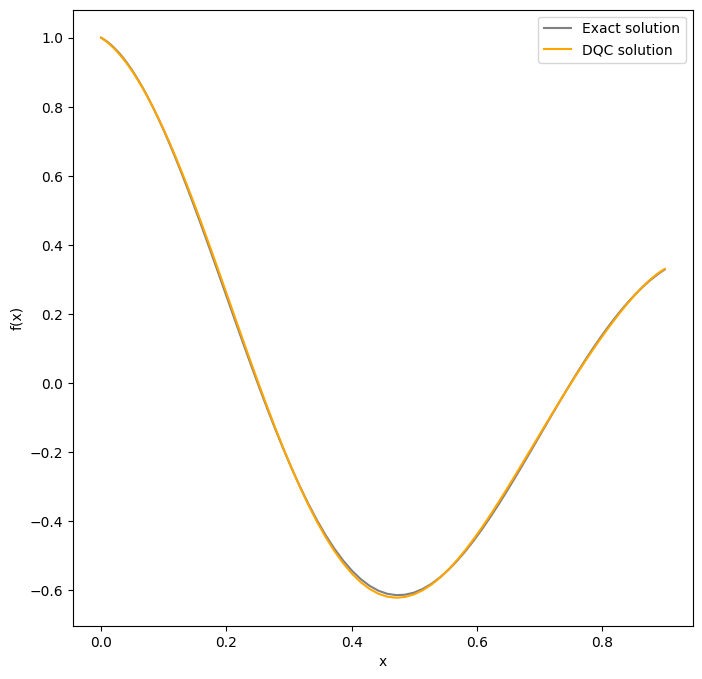

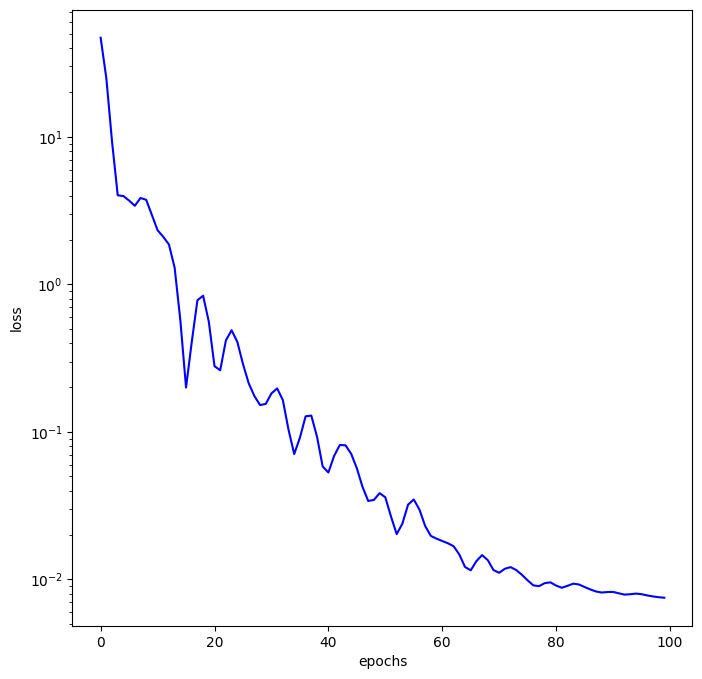

Seed id:  6
Learning rate:  0.1
k = 1
lamb = 6.283185307179586
Initial angles:  [0.61236479 0.20572468 0.06749112 0.62400456 0.577234   0.25997864
 0.69377064 0.41123077 0.63367224 0.20073101 0.99084521 0.48805777
 0.78196257 0.58639154 0.45485848 0.08675011 0.972317   0.2786114
 0.75221101 0.18242121 0.69525775 0.39101331 0.41245735 0.20287378
 0.26990232 0.32675189 0.56199419 0.83517844 0.08712688 0.13230375
 0.20098326 0.72285875 0.20298523 0.44073906 0.78407714 0.27923198]
0 (46.474416805305985, 5.815551413443627)
1 (22.146827337315806, 3.3678586386786504)
2 (13.38595470722493, 1.5260182741003654)
3 (7.7552386548599, 0.6917871914287769)
4 (4.573867884014737, 0.37805993145818506)
5 (3.354755868086136, 0.27072237196298)
6 (2.6075308280515572, 0.23141261654842352)
7 (2.1421991716916184, 0.21251821227735812)
8 (1.9627062420621466, 0.18786647044322521)
9 (1.832836600478759, 0.14839522596019697)
10 (1.5709532173197314, 0.10468627782074831)
11 (1.1777897407739353, 0.06967324926611891)
12 

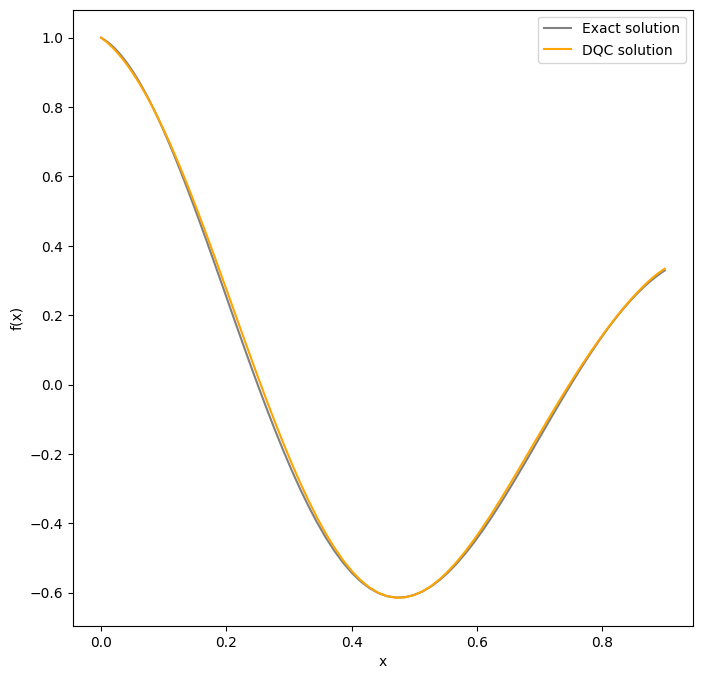

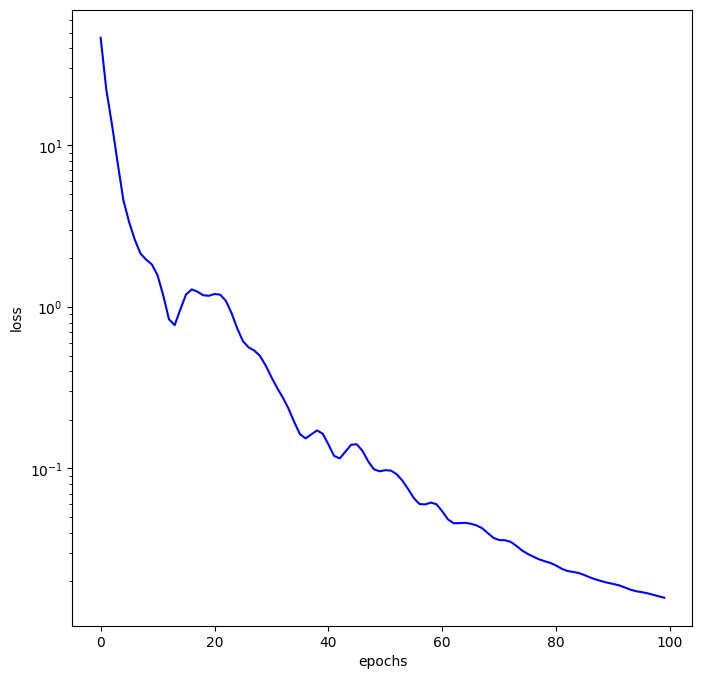

Seed id:  7
Learning rate:  0.1
k = 1
lamb = 6.283185307179586
Initial angles:  [0.33676676 0.66629863 0.94218467 0.85395614 0.32782149 0.57075881
 0.05708134 0.39378027 0.68376401 0.93904208 0.69949414 0.81297899
 0.18234727 0.83483707 0.14013248 0.49503674 0.19621135 0.91782463
 0.23553773 0.80786703 0.30127704 0.39843931 0.39493031 0.0813939
 0.46253038 0.86223527 0.3848854  0.01750728 0.98269615 0.54396546
 0.11884874 0.8194405  0.28038982 0.24258044 0.02333672 0.82941054]
0 (48.14758888223401, 2.842487229336797)
1 (27.0177771920865, 2.5651823394537003)
2 (16.97487879708437, 1.808225145072281)
3 (8.411562797229351, 1.0800444049275228)
4 (3.296507889270198, 0.5510137613394679)
5 (1.9162548411970821, 0.23513679775149887)
6 (1.8969877120816037, 0.09965524245560747)
7 (1.643351793365957, 0.05817260297752465)
8 (0.9029054014457142, 0.037836803704729485)
9 (0.3376671634057356, 0.025436032915917568)
10 (0.5723074667761034, 0.03425392930245274)
11 (1.3232991096842965, 0.058177410762627134)

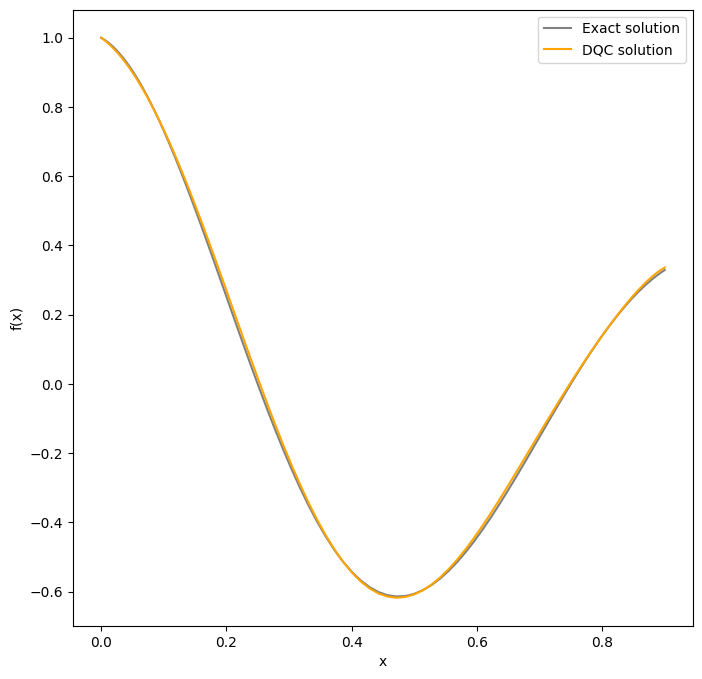

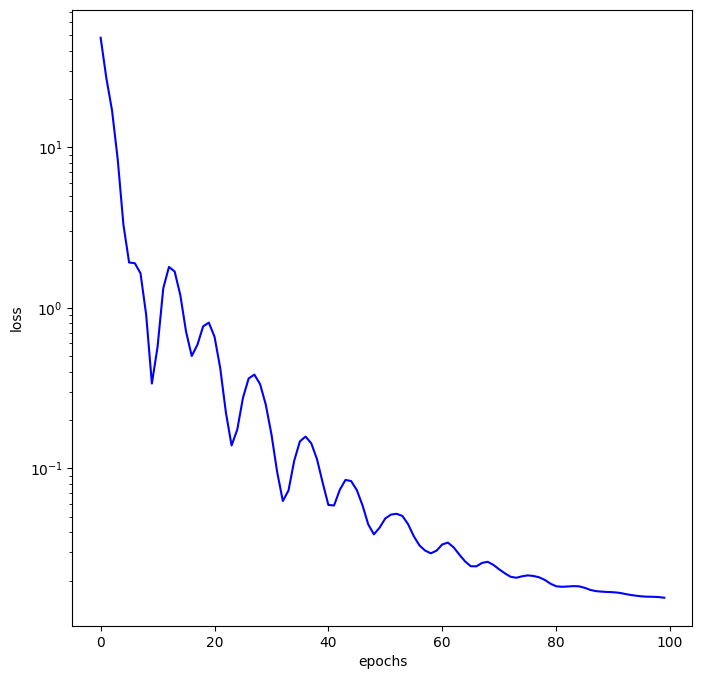

Seed id:  8
Learning rate:  0.1
k = 1
lamb = 6.283185307179586
Initial angles:  [0.87649543 0.00160596 0.91227279 0.24452496 0.75126826 0.01399033
 0.63489043 0.37688543 0.38943204 0.54475295 0.23942734 0.55573341
 0.34964977 0.51660805 0.09447821 0.57871452 0.1177181  0.00844621
 0.08545954 0.64640183 0.27743019 0.56836054 0.75552464 0.22653744
 0.64208299 0.4221048  0.16052672 0.36944465 0.30332641 0.90265948
 0.46036907 0.82305208 0.15854776 0.44244748 0.17826884 0.94227938]
0 (33.884030693487354, 2.1713519841957662)
1 (15.551379481190788, 1.0851604823117498)
2 (6.380865239451211, 0.41853381247771715)
3 (4.32980130328105, 0.1702538563228962)
4 (3.1265817225915074, 0.10093034246840116)
5 (1.485471912039088, 0.07971657576413839)
6 (1.7031325932277297, 0.10867051431467978)
7 (2.868791327795159, 0.14767003016979036)
8 (2.4333875068955577, 0.16294199136906473)
9 (1.6492571854018785, 0.1540909600895411)
10 (1.810854368017226, 0.12680410249096533)
11 (1.7997324837501956, 0.0777379236484277

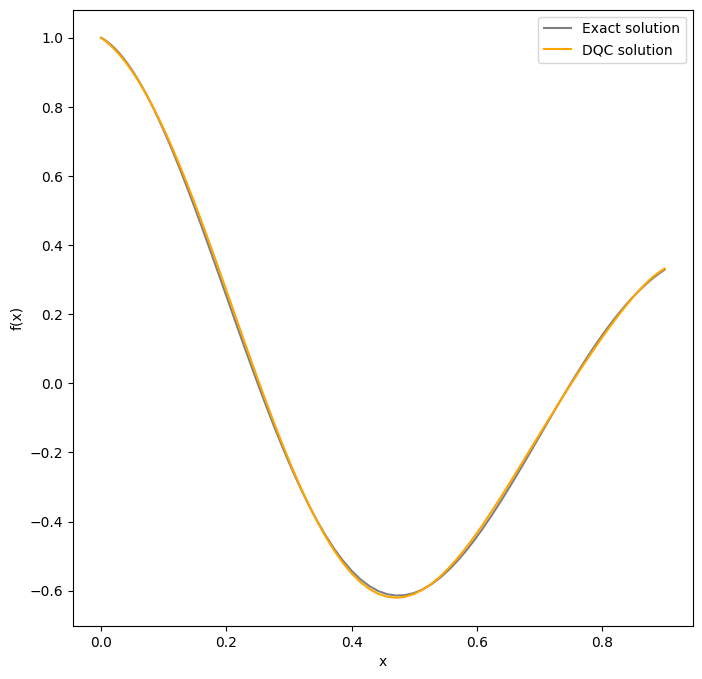

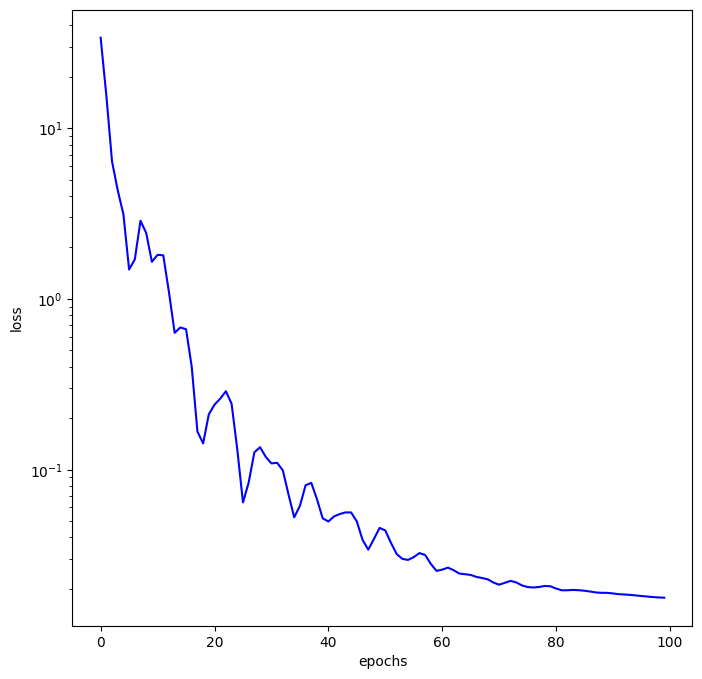

Seed id:  9
Learning rate:  0.1
k = 1
lamb = 6.283185307179586
Initial angles:  [0.35263051 0.23399876 0.06162298 0.19464458 0.69818419 0.74031085
 0.89650585 0.90245007 0.33240772 0.74430405 0.44807651 0.63559896
 0.5234873  0.64862331 0.55516692 0.17809104 0.52888842 0.88739048
 0.51955865 0.57784019 0.59954183 0.96539114 0.60722869 0.5124692
 0.34085523 0.37291713 0.28626572 0.4447699  0.74556338 0.33583721
 0.6717813  0.32012419 0.12353413 0.99535738 0.91199676 0.5944617 ]
0 (27.592176569035793, 2.7902510946250927)
1 (9.382209096452177, 1.3709353593619074)
2 (5.688953766796532, 0.5649051413448385)
3 (3.554431615668116, 0.2823802147043494)
4 (2.051698559677311, 0.22171020173028042)
5 (2.200105673266458, 0.19572068701781978)
6 (1.966346681042737, 0.10280143252335058)
7 (1.2131352317830923, 0.028794532382650506)
8 (0.6632156790950423, 0.007902085849384332)
9 (0.6309297114754158, 0.02356396573282888)
10 (0.8638823456955069, 0.045133599590014006)
11 (0.9743095395186853, 0.05383403660937

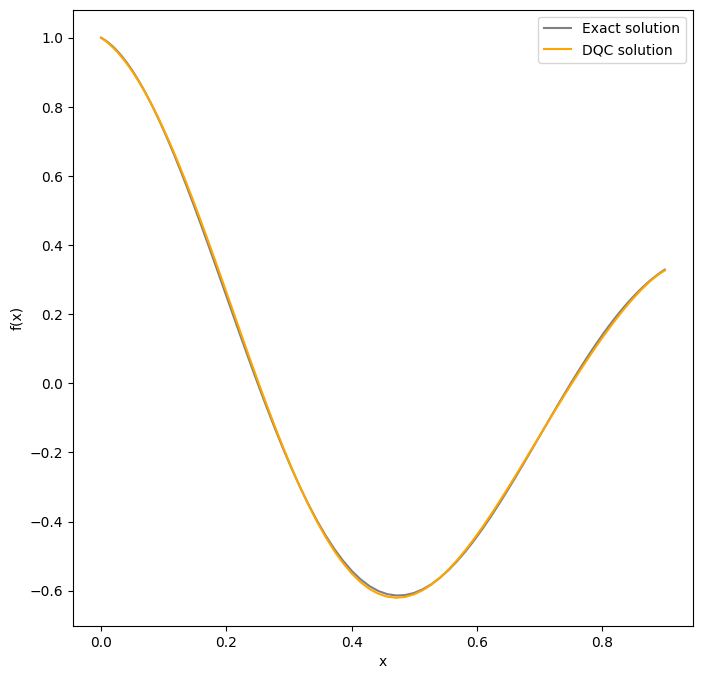

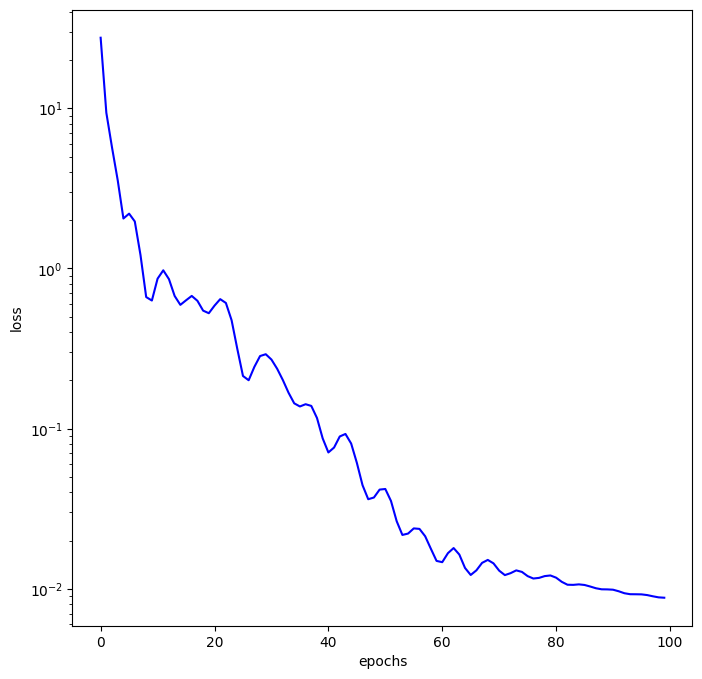

In [4]:
L_f = []
L_q = []
all_functions = []
all_losses = []
for state in range(len(RANDOM_STATES)):
    for lr in LEARNING_RATES:
        for k in K:
            for lamb in LAMBDA:
                print("Seed id: ",state)
                print("Learning rate: ",lr)
                print("k =",k)
                print("lamb =",lamb)


                ## SETTINGS ## 
                N_QUBITS, DEPTH, LEARNING_RATE, N_POINTS = 4, 3, lr, N_POINTS
                b = 1

                chebT = feature_map(n_qubits=N_QUBITS, param="x", op=RY, fm_type = BasisSet.CHEBYSHEV, reupload_scaling = ReuploadScaling.TOWER)
                fm = chebT

                torch.manual_seed(RANDOM_STATES[state])
                ansatz = hea(n_qubits=N_QUBITS, depth=DEPTH, operations=[RZ, RX, RZ])

                obs = total_magnetization(N_QUBITS) 

                circuit = QuantumCircuit(N_QUBITS, chain(fm, ansatz))
                model = QNN(circuit=circuit, observable=obs, inputs=["x"]) 
                
                inital_vparams = model.vparams
                #print("Inital params: ",inital_vparams)
                sorted_keys = sorted(inital_vparams.keys(), key=lambda k: int(k.split('_')[1]))
                inital_thetas = np.array([inital_vparams[k].item() for k in sorted_keys])
                inital_thetas = np.reshape(inital_thetas, (DEPTH, 3, N_QUBITS))
                Theta_init = np.transpose(inital_thetas, (2, 0, 1))
                theta_init = Theta_init.reshape(-1)
                print("Initial angles: ",theta_init)
                #check
                #Theta_init = np.reshape(theta_init, (N_QUBITS,DEPTH,3))
                #print("Theta: ",Theta_init)

                def loss_fn(inputs: torch.tensor, outputs: torch.tensor) -> torch.tensor:
                    boundary_loss = b*torch.ones_like(inputs) - model(torch.zeros_like(inputs))
                    outputs = outputs + boundary_loss

                    df = grad(outputs=outputs.sum(), inputs=inputs, create_graph=True)[0] 
                    g = k*outputs + lamb*torch.exp(-k*inputs)*torch.sin(lamb*inputs) 
                    ode_loss = (df+g).pow(2)
        
                    return ode_loss.mean(), outputs 


                ## TRAINING ##
                epochs = 100 
                opt = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
                losses = []
                for epoch in range(epochs):
                    opt.zero_grad()
            
                    cp = cp_fixed.clone().detach().requires_grad_(True)
                    
                    loss, f = loss_fn(inputs=cp, outputs=model(cp))
                    losses.append(loss.item())
                
                    #if (epoch % 50 == 0):
                    u = torch.exp(-k*cp.detach())*torch.cos(lamb*cp.detach()).detach().numpy()  
                    l_q = torch.sum((u-f.detach().numpy())**2)/N_POINTS
                    print(epoch, (loss.item(), l_q.item()))

                    loss.backward()
                    opt.step()


                ## TESTING ##
                analytic_sol = torch.exp(-k*sample_points.detach())*torch.cos(lamb*sample_points.detach()).detach().numpy() 

                dqc_sol = (model(sample_points) + b*torch.ones_like(sample_points)-model(torch.zeros_like(sample_points))).detach().numpy() 
                x_data = sample_points.detach().numpy()

                plt.figure(figsize=(8, 8))
                plt.plot(x_data, analytic_sol.flatten(), color="gray", label="Exact solution")
                plt.plot(x_data, dqc_sol.flatten(), color="orange", label="DQC solution")
                plt.xlabel("x")
                plt.ylabel("f(x)")
                plt.legend()
                #plt.savefig(f"f_x_{state}_{lr}_{k}_{lamb}.png")
                plt.show()

                plt.figure(figsize=(8, 8))
                plt.plot(losses, color="blue")
                plt.xlabel("epochs")
                plt.ylabel("loss")
                plt.yscale('log')
                #plt.savefig(f"losses_{state}_{lr}_{k}_{lamb}.png")
                plt.show()

                L_f.append(losses[-1])
                L_q.append(torch.sum((analytic_sol-dqc_sol)**2) /len(sample_points))
                all_functions.append(dqc_sol.flatten())
                all_losses.append(losses)

In [5]:
print("L_f: ",L_f)
print()
L_q = [q.item() for q in L_q]
print("L_q: ",L_q)

L_f:  [0.02265888489326347, 0.007609296372033938, 0.006833317822377755, 0.021835005772600613, 0.020608439524481083, 0.007512110936432436, 0.015842523741281964, 0.015638130247423353, 0.017748324755755274, 0.008801690174871707]

L_q:  [8.278827817076452e-05, 3.211316371168678e-05, 2.7540294815805643e-05, 7.09442474575829e-05, 8.35598947791805e-05, 1.9371534530734526e-05, 9.672149530726651e-05, 6.682415509761221e-05, 5.129280548838721e-05, 2.750457909421706e-05]


### Best solutions

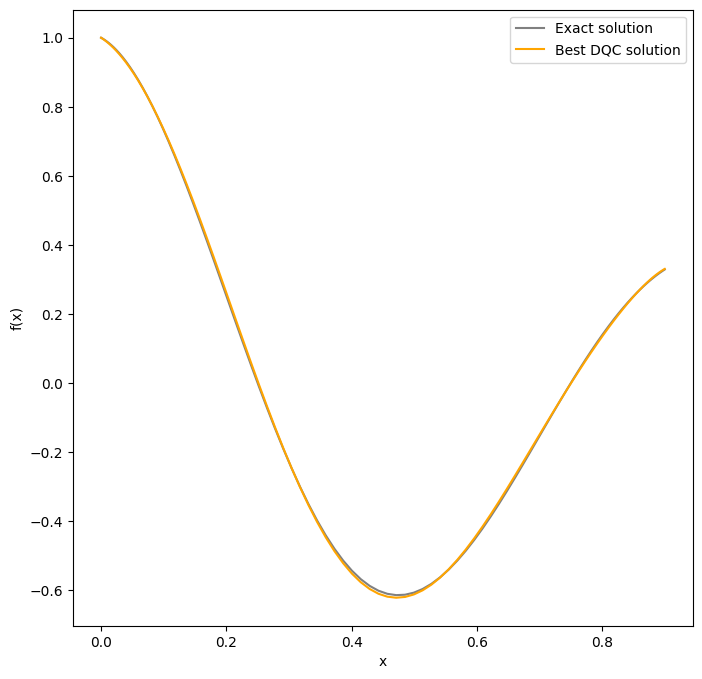

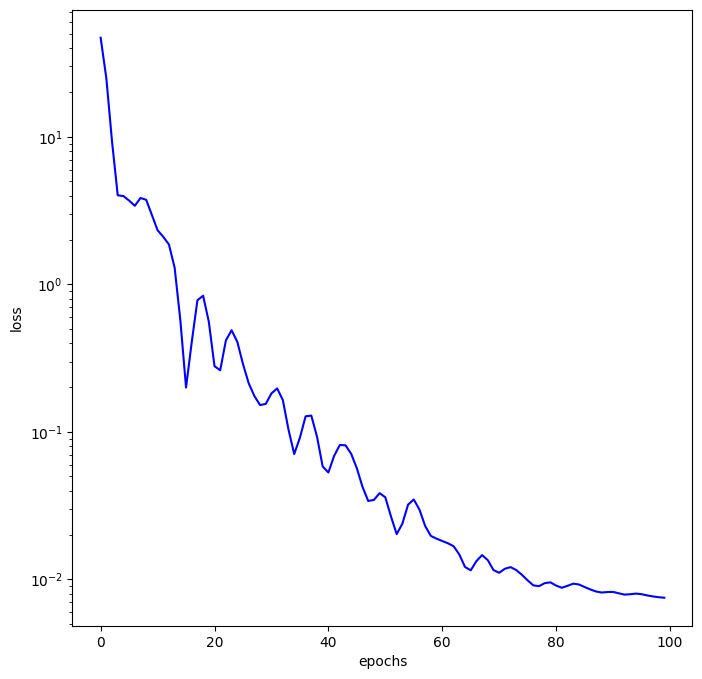


Top 10 indices (sorted by L_q): 
1. Index 5, L_f = 0.007512, L_q = 0.000019
2. Index 9, L_f = 0.008802, L_q = 0.000028
3. Index 2, L_f = 0.006833, L_q = 0.000028
4. Index 1, L_f = 0.007609, L_q = 0.000032
5. Index 8, L_f = 0.017748, L_q = 0.000051
6. Index 7, L_f = 0.015638, L_q = 0.000067
7. Index 3, L_f = 0.021835, L_q = 0.000071
8. Index 0, L_f = 0.022659, L_q = 0.000083
9. Index 4, L_f = 0.020608, L_q = 0.000084
10. Index 6, L_f = 0.015843, L_q = 0.000097


In [6]:
# Step 1: Collect all entries
all_entries = [(i, L_f[i], L_q[i]) for i in range(len(L_q))]

# Step 2: Sort by L_q only
top_10 = sorted(all_entries, key=lambda x: x[2])[:10]

# Step 3: Use the best one (lowest L_q) for plotting
best_index = top_10[0][0]
best_L_f = top_10[0][1]
best_L_q = top_10[0][2]
best_solution = all_functions[best_index]
best_loss = all_losses[best_index]

plt.figure(figsize=(8, 8))
plt.plot(x_data, analytic_sol.flatten(), color="gray", label="Exact solution")
plt.plot(x_data, best_solution.flatten(), color="orange", label="Best DQC solution")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.savefig(f"best_f_x.png")
plt.show()

plt.figure(figsize=(8, 8))
plt.plot(best_loss, color="blue")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.yscale('log')
plt.savefig(f"best_losses.png")
plt.show()

# Print top 10 indices
print("\nTop 10 indices (sorted by L_q): ")
for rank, (i, lf, lq) in enumerate(top_10, 1):
    print(f"{rank}. Index {i}, L_f = {lf:.6f}, L_q = {lq:.6f}")

### Mean solution

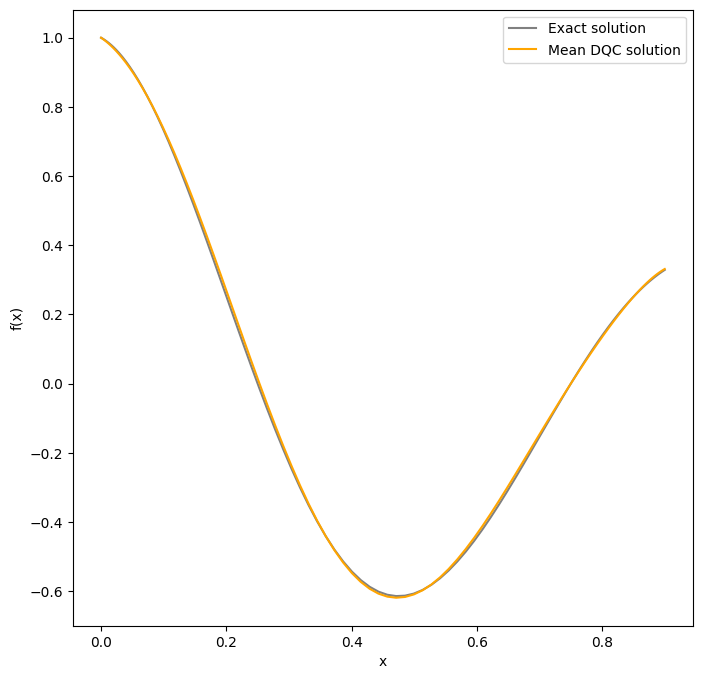

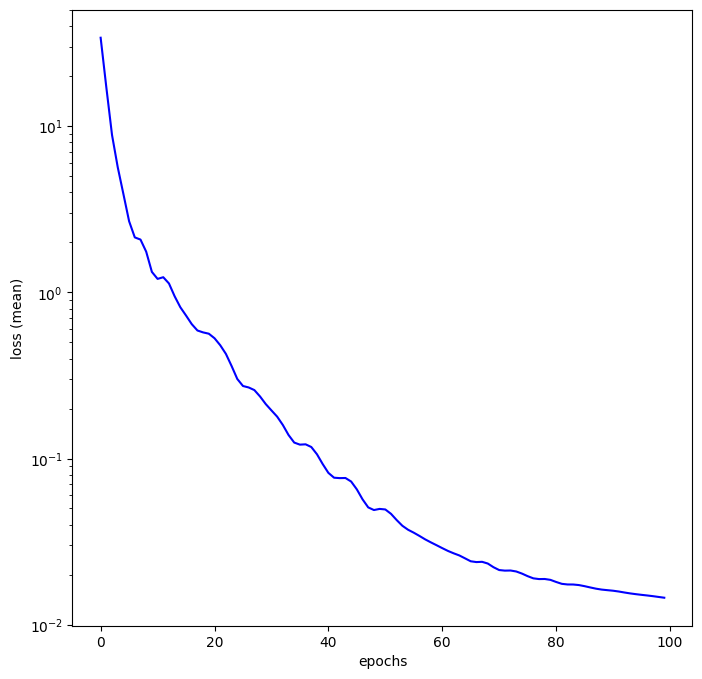

Preds std:  0.0031557615174266254
Mean L_f:  0.014508772424052158
Mean L_q:  5.586604484532379e-05


In [7]:
mean_loss = np.mean(all_losses, axis=0)
mean_solution = np.mean(all_functions, axis=0)
mean_L_f = np.mean(L_f, axis=0)
mean_L_q = np.mean(L_q, axis=0)

plt.figure(figsize=(8, 8))
plt.plot(x_data, analytic_sol.flatten(), color="gray", label="Exact solution")
plt.plot(x_data, mean_solution.flatten(), color="orange", label="Mean DQC solution")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.savefig("mean_f_x.png")
plt.show()

plt.figure(figsize=(8, 8))
plt.plot(mean_loss, color="blue")
plt.xlabel("epochs")
plt.ylabel("loss (mean)")
plt.yscale('log')
plt.savefig("mean_losses.png")
plt.show()

print("Preds std: ",np.sqrt(np.mean(np.std(all_functions, axis=0)**2)))
print("Mean L_f: ",mean_L_f)
print("Mean L_q: ",mean_L_q)

### Stats

In [8]:
L_f_threshold = 10**(-1)
L_q_threshold = 10**(-4) 
count = sum(1 for f, q in zip(L_f, L_q) if f < L_f_threshold and q < L_q_threshold)

print("Number of good solutions: ",count) 

Number of good solutions:  10


In [9]:
print("Number of good L_f: ",sum(1 for f in L_f if f < L_f_threshold)) 
print("Number of good L_q: ",sum(1 for q in L_q if q < L_q_threshold))

Number of good L_f:  10
Number of good L_q:  10
